In [1]:
# Importing required library's 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load CSV Files
student_df = pd.read_csv('students.csv')
course_activity_df = pd.read_csv('course_activity.csv')
feedback_df = pd.read_csv('feedback.csv')

In [3]:
# Display the first few rows of each to understand the structure 
student_head = student_df.head()
course_activity_head = course_activity_df.head()
feedback_head = feedback_df.head()

In [4]:
student_head,course_activity_head,feedback_head

(  Student_ID       Name  Age  Gender   Location Enrolment_Date
 0       S001  Student_1   24  Female    Kolkata     24/11/2023
 1       S002  Student_2   32   Other    Chennai     27/02/2023
 2       S003  Student_3   28   Other     Mumbai     13/01/2023
 3       S004  Student_4   25  Female  Bangalore     21/05/2023
 4       S005  Student_5   24   Other      Delhi     06/05/2023,
   Student_ID Course_ID        Date  Time_Spent_Minutes  Completion_Percentage
 0       S001     PY202  05/01/2024                  90                  46.10
 1       S001     DM101  28/01/2024                 155                  88.87
 2       S001     UX303  28/01/2024                 177                  54.93
 3       S002     PY202  03/02/2024                  45                  32.20
 4       S002     UX303  15/03/2024                 119                  90.80,
   Student_ID Course_ID  Rating       Feedback_Text
 0       S057     UX303       2      Too fast-paced
 1       S063     PY202       2  Lov

In [5]:
#checking data types and other information.
student_df.info(),course_activity_df.info(),feedback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Student_ID      100 non-null    object
 1   Name            100 non-null    object
 2   Age             100 non-null    int64 
 3   Gender          100 non-null    object
 4   Location        100 non-null    object
 5   Enrolment_Date  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             659 non-null    object 
 1   Course_ID              659 non-null    object 
 2   Date                   659 non-null    object 
 3   Time_Spent_Minutes     659 non-null    int64  
 4   Completion_Percentage  659 non-null    float64
dtypes: float64(1), int64(1

(None, None, None)

# Enrolment_date, date  is an object 
### convert to datetime

In [6]:
# standardize data formats
student_df['Enrolment_Date'] = pd.to_datetime(student_df['Enrolment_Date'],
                                             dayfirst=True, errors='coerce')

In [7]:
course_activity_df['Date'] = pd.to_datetime(course_activity_df['Date'],
                                             dayfirst=True, errors='coerce')

## Conver data types 

In [8]:
course_activity_df['Time_Spent_Minutes'] = pd.to_numeric(course_activity_df['Time_Spent_Minutes'],
                                                        errors = 'coerce')
course_activity_df['Completion_Percentage'] = pd.to_numeric(course_activity_df['Completion_Percentage'],
                                                        errors = 'coerce')
feedback_df['Rating'] = pd.to_numeric(feedback_df['Rating'],
                                                        errors = 'coerce')


## Check for missing values

In [9]:
missing_students = student_df.isnull().sum()
missing_course_Activity =course_activity_df.isnull().sum()
missing_feedback = feedback_df.isnull().sum()
missing_course_Activity,missing_feedback,missing_students

(Student_ID               0
 Course_ID                0
 Date                     0
 Time_Spent_Minutes       0
 Completion_Percentage    0
 dtype: int64,
 Student_ID       0
 Course_ID        0
 Rating           0
 Feedback_Text    0
 dtype: int64,
 Student_ID        0
 Name              0
 Age               0
 Gender            0
 Location          0
 Enrolment_Date    0
 dtype: int64)

# Remove Duplicates

In [10]:
student_df.drop_duplicates(inplace=True)
course_activity_df.drop_duplicates(inplace=True)
feedback_df.drop_duplicates(inplace=True)

## Cleaned data & Missing value summary

In [11]:
{
    "Missing Values - Students": missing_students,
    "Missing Values - course_Activity": missing_course_Activity,
    "Missing Values - Feedback": missing_feedback,
    "Students Sample": student_df.head(),
    "Activity Sample": course_activity_df.head(),
    "Feedback Sample": feedback_df.head()
}

{'Missing Values - Students': Student_ID        0
 Name              0
 Age               0
 Gender            0
 Location          0
 Enrolment_Date    0
 dtype: int64,
 'Missing Values - course_Activity': Student_ID               0
 Course_ID                0
 Date                     0
 Time_Spent_Minutes       0
 Completion_Percentage    0
 dtype: int64,
 'Missing Values - Feedback': Student_ID       0
 Course_ID        0
 Rating           0
 Feedback_Text    0
 dtype: int64,
 'Students Sample':   Student_ID       Name  Age  Gender   Location Enrolment_Date
 0       S001  Student_1   24  Female    Kolkata     2023-11-24
 1       S002  Student_2   32   Other    Chennai     2023-02-27
 2       S003  Student_3   28   Other     Mumbai     2023-01-13
 3       S004  Student_4   25  Female  Bangalore     2023-05-21
 4       S005  Student_5   24   Other      Delhi     2023-05-06,
 'Activity Sample':   Student_ID Course_ID       Date  Time_Spent_Minutes  Completion_Percentage
 0       S001 

In [12]:
# Saving cleaned data to CSV
student_df.to_csv('clean_student.csv')
course_activity_df.to_csv('clean_course_activity.csv')
feedback_df.to_csv('clean_feedback.csv')

# Ready for analysis

### Exploratory Data Analysis (EDA)

### What is the overall average completion rate across courses?

In [13]:
# working with course activity data
avg_completion_rate = course_activity_df['Completion_Percentage'].mean().round(2)

In [14]:
avg_completion_rate

54.78

### Which course has the highest and lowest average engagement time?

In [15]:
avg_time_per_course = course_activity_df.groupby('Course_ID')['Time_Spent_Minutes'].mean()
avg_time_per_course

Course_ID
DM101    102.427673
PY202     93.902439
UX303     99.816568
WD404     96.419162
Name: Time_Spent_Minutes, dtype: float64

In [16]:
highest_engagement_course = avg_time_per_course.idxmax()
lowest_engagement_course = avg_time_per_course.idxmin()
{
    'highest_engagement_time' : (highest_engagement_course,round(avg_time_per_course.max(),2)),
    'lowest_engagement_course' : (lowest_engagement_course,round(avg_time_per_course.min(),2))
}

{'highest_engagement_time': ('DM101', 102.43),
 'lowest_engagement_course': ('PY202', 93.9)}

### How does engagement differ by age group or location?

In [17]:
# Merge course_activity_df and student_df
course_activity_merged = course_activity_df.merge(student_df, on='Student_ID')
course_activity_merged

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage,Name,Age,Gender,Location,Enrolment_Date
0,S001,PY202,2024-01-05,90,46.10,Student_1,24,Female,Kolkata,2023-11-24
1,S001,DM101,2024-01-28,155,88.87,Student_1,24,Female,Kolkata,2023-11-24
2,S001,UX303,2024-01-28,177,54.93,Student_1,24,Female,Kolkata,2023-11-24
3,S002,PY202,2024-02-03,45,32.20,Student_2,32,Other,Chennai,2023-02-27
4,S002,UX303,2024-03-15,119,90.80,Student_2,32,Other,Chennai,2023-02-27
...,...,...,...,...,...,...,...,...,...,...
654,S100,PY202,2024-03-03,83,22.63,Student_100,22,Other,Bangalore,2023-06-16
655,S100,UX303,2024-02-27,168,14.83,Student_100,22,Other,Bangalore,2023-06-16
656,S100,UX303,2024-01-02,134,22.29,Student_100,22,Other,Bangalore,2023-06-16
657,S100,WD404,2024-03-12,139,68.78,Student_100,22,Other,Bangalore,2023-06-16


In [18]:
# create age groups
bins = [0, 20, 30, 40, 100]
labels = ['<20','21-30','31-40','40+']
course_activity_merged['Age_Group'] = pd.cut(course_activity_merged['Age'], bins=bins, labels=labels,
                                            right=False)

In [19]:
course_activity_merged

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage,Name,Age,Gender,Location,Enrolment_Date,Age_Group
0,S001,PY202,2024-01-05,90,46.10,Student_1,24,Female,Kolkata,2023-11-24,21-30
1,S001,DM101,2024-01-28,155,88.87,Student_1,24,Female,Kolkata,2023-11-24,21-30
2,S001,UX303,2024-01-28,177,54.93,Student_1,24,Female,Kolkata,2023-11-24,21-30
3,S002,PY202,2024-02-03,45,32.20,Student_2,32,Other,Chennai,2023-02-27,31-40
4,S002,UX303,2024-03-15,119,90.80,Student_2,32,Other,Chennai,2023-02-27,31-40
...,...,...,...,...,...,...,...,...,...,...,...
654,S100,PY202,2024-03-03,83,22.63,Student_100,22,Other,Bangalore,2023-06-16,21-30
655,S100,UX303,2024-02-27,168,14.83,Student_100,22,Other,Bangalore,2023-06-16,21-30
656,S100,UX303,2024-01-02,134,22.29,Student_100,22,Other,Bangalore,2023-06-16,21-30
657,S100,WD404,2024-03-12,139,68.78,Student_100,22,Other,Bangalore,2023-06-16,21-30


In [20]:
engagement_by_age = course_activity_merged.groupby('Age_Group')['Time_Spent_Minutes'].mean()
engagement_by_location = course_activity_merged.groupby('Location')['Time_Spent_Minutes'].mean()

{
    'engagement_by_age' : round(engagement_by_age,2),
    'engagement_by_location' : round(engagement_by_location,2)
}

C:\Users\yoges\AppData\Local\Temp\ipykernel_29296\538864274.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engagement_by_age = course_activity_merged.groupby('Age_Group')['Time_Spent_Minutes'].mean()


{'engagement_by_age': Age_Group
 <20      104.11
 21-30     97.80
 31-40     95.53
 40+         NaN
 Name: Time_Spent_Minutes, dtype: float64,
 'engagement_by_location': Location
 Bangalore     98.00
 Chennai       90.95
 Delhi        103.30
 Kolkata      104.38
 Mumbai        95.44
 Name: Time_Spent_Minutes, dtype: float64}

### What is the average feedback rating per course?

In [21]:
avg_rating_per_course = feedback_df.groupby('Course_ID')['Rating'].mean()
round(avg_rating_per_course,2)

Course_ID
DM101    2.90
PY202    3.28
UX303    2.92
WD404    2.79
Name: Rating, dtype: float64

### Is there a correlation between completion rate and feedback rating?

In [22]:
# Merge feedback and activity on Student_ID & Course_ID
feedback_activity = feedback_df.merge(course_activity_df, on=['Student_ID','Course_ID'])
correlation = feedback_activity[['Completion_Percentage','Rating']].corr().iloc[0,1]
{
    'feedback_activity' : feedback_activity,
    'correlation' : correlation
}

{'feedback_activity':     Student_ID Course_ID  Rating         Feedback_Text       Date  \
 0         S057     UX303       2        Too fast-paced 2024-01-09   
 1         S057     UX303       2        Too fast-paced 2024-03-10   
 2         S063     PY202       2    Loved the examples 2024-02-25   
 3         S063     PY202       2    Loved the examples 2024-01-21   
 4         S063     PY202       2    Loved the examples 2024-02-14   
 ..         ...       ...     ...                   ...        ...   
 117       S082     WD404       2        Too fast-paced 2024-03-12   
 118       S067     DM101       5  Excellent instructor 2024-02-20   
 119       S067     DM101       5  Excellent instructor 2024-01-06   
 120       S002     PY202       3       Well structured 2024-02-03   
 121       S002     PY202       3       Well structured 2024-03-06   
 
      Time_Spent_Minutes  Completion_Percentage  
 0                    98                  31.70  
 1                    96             

### Identify top 3 student segments based on engagement and satisfaction.

In [23]:
# Add age group and location to feedback_activity
feedback_activity = feedback_activity.merge(student_df[['Student_ID', 'Age', 'Gender', 'Location']],
                                           on='Student_ID')
feedback_activity['Age_Group'] = pd.cut(feedback_activity['Age'], 
                                       bins=bins, labels = labels, right=False)

In [24]:
# Segment by Age Group and Location for combined score (engagement + satisfaction)

segment_scores = feedback_activity.groupby(['Age_Group','Location'])[['Time_Spent_Minutes','Rating']].mean()
segment_scores['Engagement_Satisfaction_Score'] = round(segment_scores['Time_Spent_Minutes'] 
                                                        + segment_scores['Rating'],2)
Top_Segments = segment_scores.sort_values(by='Engagement_Satisfaction_Score', ascending=False).head(3)

C:\Users\yoges\AppData\Local\Temp\ipykernel_29296\2111409912.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_scores = feedback_activity.groupby(['Age_Group','Location'])[['Time_Spent_Minutes','Rating']].mean()


In [25]:
Top_Segments

,,Time_Spent_Minutes,Rating,Engagement_Satisfaction_Score
Age_Group,Location,,,
21-30,Bangalore,121.300000,3.000000,124.30
31-40,Delhi,118.500000,3.071429,121.57
<20,Kolkata,113.666667,4.666667,118.33


## Results 

In [26]:

{
    "Average Completion Rate": avg_completion_rate,
    "Course with Highest Engagement Time": (highest_engagement_course, avg_time_per_course[highest_engagement_course]),
    "Course with Lowest Engagement Time": (lowest_engagement_course, avg_time_per_course[lowest_engagement_course]),
    "Engagement by Age Group": engagement_by_age,
    "Engagement by Location": engagement_by_location.sort_values(ascending=False),
    "Average Rating per Course": avg_rating_per_course.sort_values(ascending=False),
    "Correlation between Completion & Rating": correlation,
    "Top 3 Segments by Engagement & Satisfaction": Top_Segments
}


{'Average Completion Rate': 54.78,
 'Course with Highest Engagement Time': ('DM101', 102.42767295597484),
 'Course with Lowest Engagement Time': ('PY202', 93.90243902439025),
 'Engagement by Age Group': Age_Group
 <20      104.109890
 21-30     97.796069
 31-40     95.527950
 40+             NaN
 Name: Time_Spent_Minutes, dtype: float64,
 'Engagement by Location': Location
 Kolkata      104.384615
 Delhi        103.302857
 Bangalore     98.000000
 Mumbai        95.435484
 Chennai       90.946746
 Name: Time_Spent_Minutes, dtype: float64,
 'Average Rating per Course': Course_ID
 PY202    3.277778
 UX303    2.923077
 DM101    2.900000
 WD404    2.789474
 Name: Rating, dtype: float64,
 'Correlation between Completion & Rating': -0.05170765814948305,
 'Top 3 Segments by Engagement & Satisfaction':                      Time_Spent_Minutes    Rating  \
 Age_Group Location                                  
 21-30     Bangalore          121.300000  3.000000   
 31-40     Delhi              118.

## Visualisations

### Engagement by Course

C:\Users\yoges\AppData\Local\Temp\ipykernel_29296\1424984795.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=course_activity_merged, x='Course_ID', y='Time_Spent_Minutes',


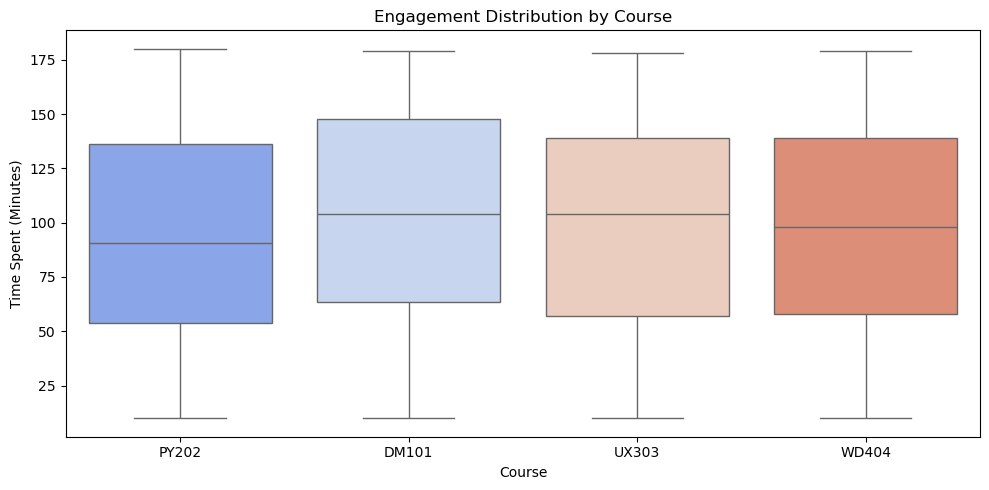

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(data=course_activity_merged, x='Course_ID', y='Time_Spent_Minutes',
             palette='coolwarm')
plt.title('Engagement Distribution by Course')
plt.ylabel("Time Spent (Minutes)")
plt.xlabel("Course")
plt.tight_layout()
plt.show()

###  Engagement by Age Group and Gender

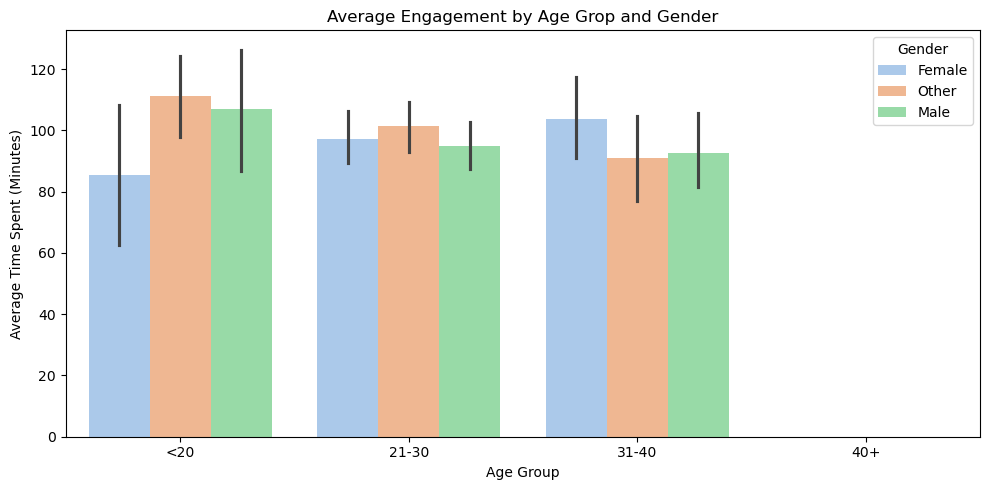

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(data=course_activity_merged, x='Age_Group', y='Time_Spent_Minutes',
           hue='Gender', palette='pastel')
plt.title('Average Engagement by Age Grop and Gender')
plt.ylabel('Average Time Spent (Minutes)')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

### Feedback Ratings per Course

In [29]:
avg_rating_per_course 

Course_ID
DM101    2.900000
PY202    3.277778
UX303    2.923077
WD404    2.789474
Name: Rating, dtype: float64

C:\Users\yoges\AppData\Local\Temp\ipykernel_29296\2894083969.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = avg_rating_per_course.index, y = avg_rating_per_course.values,


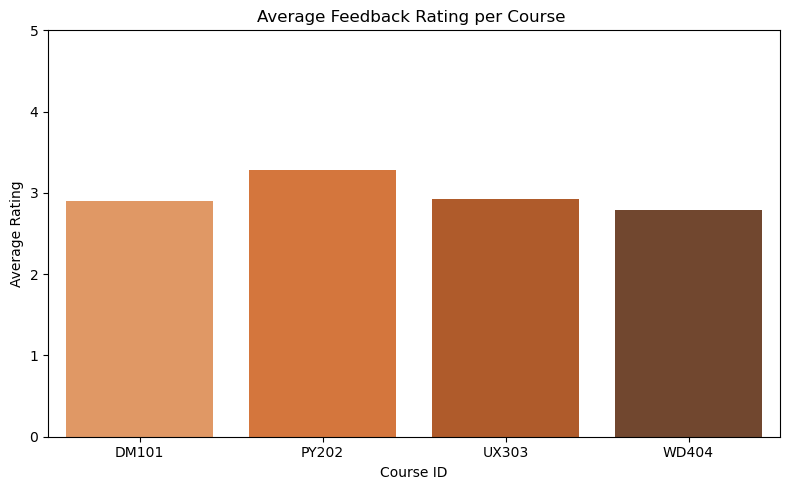

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x = avg_rating_per_course.index, y = avg_rating_per_course.values,
           palette = 'Oranges_d')
plt.title("Average Feedback Rating per Course ")
plt.xlabel('Course ID')
plt.ylabel('Average Rating')
plt.ylim(0,5)
plt.tight_layout()
plt.show()

### Completion vs Rating (Correlation Scatter)

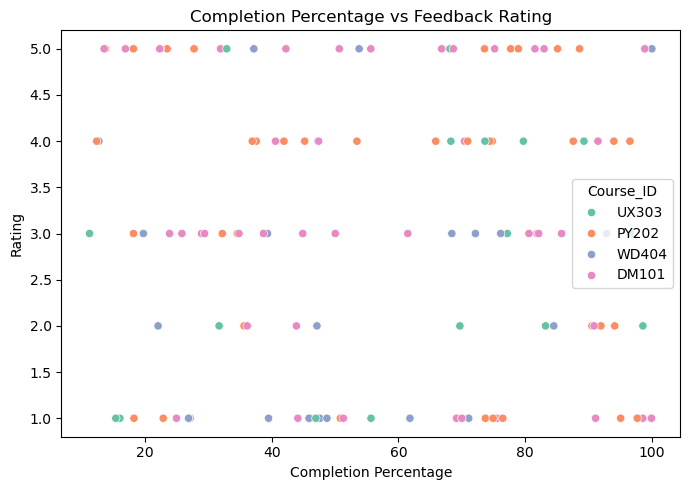

In [31]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=feedback_activity, x = 'Completion_Percentage', y = "Rating",
               hue = 'Course_ID', palette = 'Set2')
plt.title('Completion Percentage vs Feedback Rating')
plt.xlabel('Completion Percentage')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

###  Engagement Trend Over Time

In [32]:
 # 7-day rolling average
activity_over_time = course_activity_df.groupby('Date')['Time_Spent_Minutes'].mean().rolling(7).mean() 

In [33]:
activity_over_time

Date
2024-01-01           NaN
2024-01-02           NaN
2024-01-03           NaN
2024-01-04           NaN
2024-01-05           NaN
                 ...    
2024-03-27     98.800397
2024-03-28     95.860714
2024-03-29     95.984524
2024-03-30    100.460714
2024-03-31     99.415816
Name: Time_Spent_Minutes, Length: 91, dtype: float64

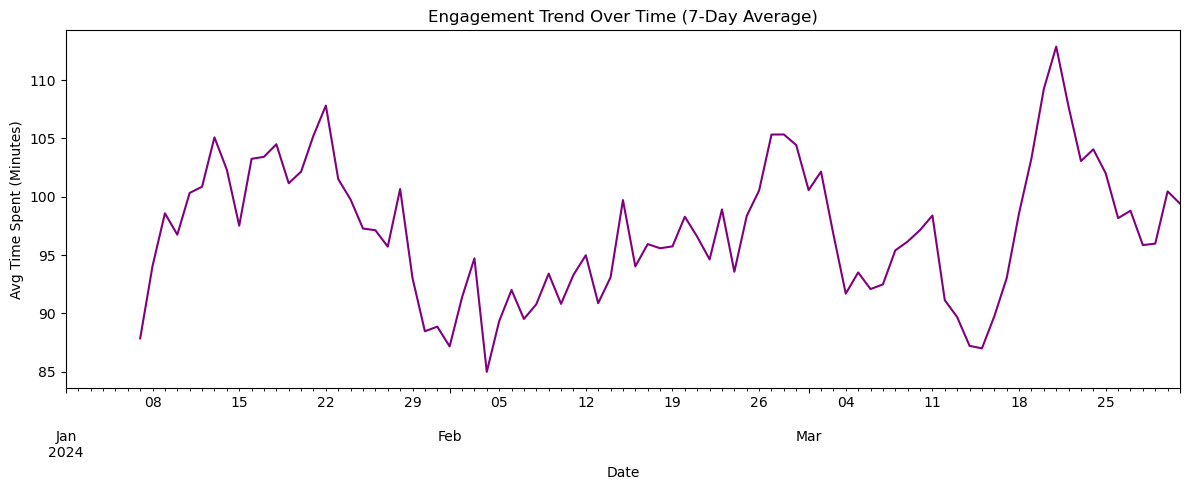

In [34]:
plt.figure(figsize=(12, 5))
activity_over_time.plot(color='purple')
plt.title("Engagement Trend Over Time (7-Day Average)")
plt.ylabel("Avg Time Spent (Minutes)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()